In [1]:
import time
import numpy as np
import h5py 
import matplotlib.pyplot as plt
import scipy 
from PIL import Image 
from scipy import ndimage
from dnn_app_utils import * 

%matplotlib inline
plt.rcParams['figure.figsize'] = (5.0, 4.0) 
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

%load_ext autoreload
%autoreload 2

np.random.seed(99)

### Load and process the dataset 

In [2]:
train_x_orig, train_y, test_x_orig, test_y, classes = load_data()

y = 0. It's a non-cat picture.


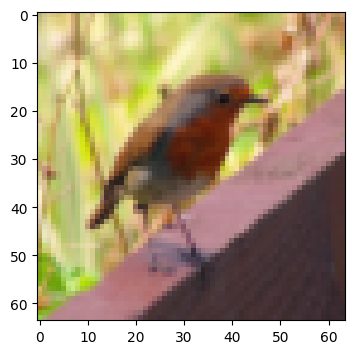

In [3]:
# Example of a picture
index = 10
plt.imshow(train_x_orig[index])
print ("y = " + str(train_y[0,index]) + ". It's a " + classes[train_y[0,index]].decode("utf-8") +  " picture.")

In [4]:
# Explore dataset 
m_train = train_x_orig.shape[0]
num_px = train_x_orig.shape[1]
m_test = test_x_orig.shape[0]

print ("Number of training examples: " + str(m_train))
print ("Number of testing examples: " + str(m_test))
print ("Each image is of size: (" + str(num_px) + ", " + str(num_px) + ", 3)")
print ("train_x_orig shape: " + str(train_x_orig.shape))
print ("train_y shape: " + str(train_y.shape))
print ("test_x_orig shape: " + str(test_x_orig.shape))
print ("test_y shape: " + str(test_y.shape))

Number of training examples: 209
Number of testing examples: 50
Each image is of size: (64, 64, 3)
train_x_orig shape: (209, 64, 64, 3)
train_y shape: (1, 209)
test_x_orig shape: (50, 64, 64, 3)
test_y shape: (1, 50)


In [5]:
# Reshape the training and test examples 
train_x_flatten = train_x_orig.reshape(train_x_orig.shape[0], -1).T   # The "-1" makes reshape flatten the remaining dimensions
test_x_flatten = test_x_orig.reshape(test_x_orig.shape[0], -1).T

# Standardize data to have feature values between 0 and 1.
train_x = train_x_flatten/255.
test_x = test_x_flatten/255.

print ("train_x's shape: " + str(train_x.shape))
print ("test_x's shape: " + str(test_x.shape))

train_x's shape: (12288, 209)
test_x's shape: (12288, 50)


### L-layer neural network 

In [6]:
layers_dims = [12288, 20, 7, 5, 3, 1] #  5-layer model

In [7]:
# FUNCTION: L_layer_model

def L_layer_model(X, Y, layers_dims, learning_rate = 0.0075, num_iterations = 3000, print_cost=False):
    """
    Implements a L-layer neural network: [LINEAR->RELU]*(L-1)->LINEAR->SIGMOID.
    
    Arguments:
    X -- input data, of shape (n_x, number of examples)
    Y -- true "label" vector (containing 1 if cat, 0 if non-cat), of shape (1, number of examples)
    layers_dims -- list containing the input size and each layer size, of length (number of layers + 1).
    learning_rate -- learning rate of the gradient descent update rule
    num_iterations -- number of iterations of the optimization loop
    print_cost -- if True, it prints the cost every 100 steps
    
    Returns:
    parameters -- parameters learnt by the model. They can then be used to predict.
    """

    np.random.seed(99)
    costs = [] # keep track of cost
    
    # Parameters initialization.
    parameters = initialize_parameters_deep(layers_dims)
    
    # Loop (gradient descent)
    for i in range(0, num_iterations):

        # Forward propagation: [LINEAR -> RELU]*(L-1) -> LINEAR -> SIGMOID.
        AL, caches = L_model_forward(X, parameters)
        
        # Compute cost.
        cost = compute_cost(AL, Y)
    
        # Backward propagation.
        grads = L_model_backward(AL, Y, caches)
 
        # Update parameters.
        parameters = update_parameters(parameters, grads, learning_rate)
                
        # Print the cost every 100 iterations
        if print_cost and i % 100 == 0 or i == num_iterations - 1:
            print("Cost after iteration {}: {}".format(i, np.squeeze(cost)))
        if i % 100 == 0 or i == num_iterations:
            costs.append(cost)
    
    return parameters, costs

In [8]:
parameters, costs = L_layer_model(train_x, train_y, layers_dims, num_iterations = 2700, print_cost = True)

Cost after iteration 0: 0.7099716419586671
Cost after iteration 100: 0.677224843264073
Cost after iteration 200: 0.665781656205835
Cost after iteration 300: 0.6575256326907254
Cost after iteration 400: 0.6508899093216572
Cost after iteration 500: 0.6450315676689374
Cost after iteration 600: 0.6379653555605419
Cost after iteration 700: 0.6281285726271919
Cost after iteration 800: 0.6089539766397705
Cost after iteration 900: 0.5739561309127189
Cost after iteration 1000: 0.5211174723920341
Cost after iteration 1100: 0.4535122737976253
Cost after iteration 1200: 0.3988198168435804
Cost after iteration 1300: 0.3522125256418325
Cost after iteration 1400: 0.3030496277625194
Cost after iteration 1500: 0.2764189673745522
Cost after iteration 1600: 0.24598381583031942
Cost after iteration 1700: 0.2306908146315884
Cost after iteration 1800: 0.21538469684885955
Cost after iteration 1900: 0.20181710975212103
Cost after iteration 2000: 0.18411034813584654
Cost after iteration 2100: 0.168438750765451

In [9]:
pred_train = predict(train_x, train_y, parameters)

Accuracy: 0.9808612440191385


In [10]:
pred_test = predict(test_x, test_y, parameters)

Accuracy: 0.8200000000000001


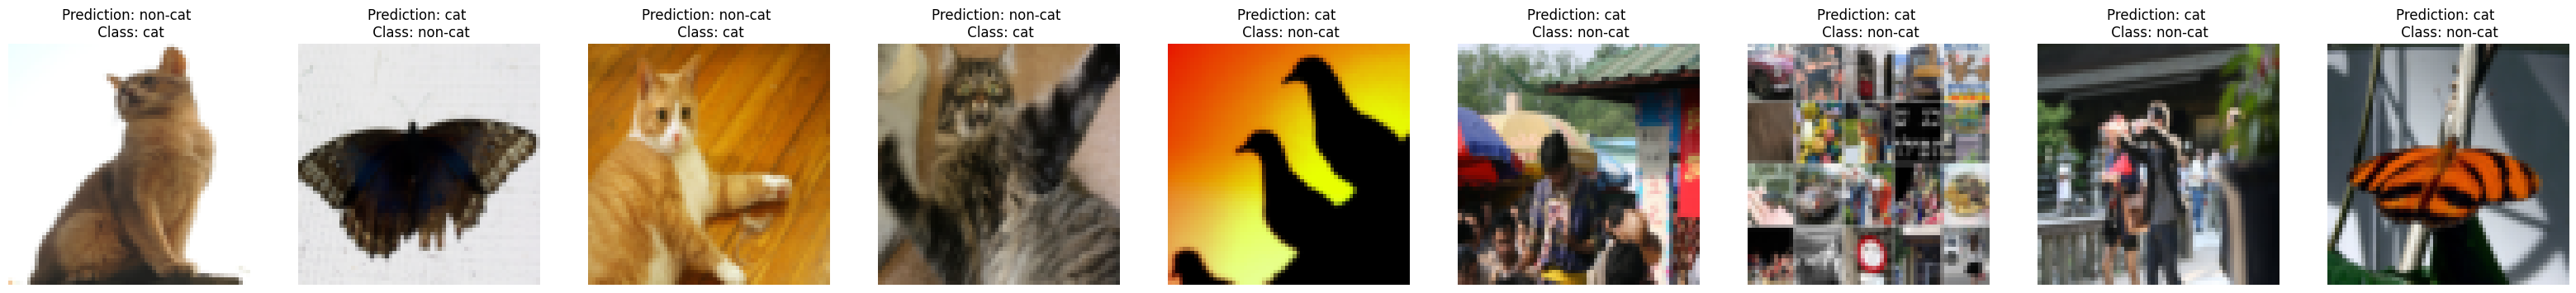

In [11]:
print_mislabeled_images(classes, test_x, test_y, pred_test)

### Test with your own image 

Accuracy: 1.0
y = 1.0, your L-layer model predicts a "cat" picture.


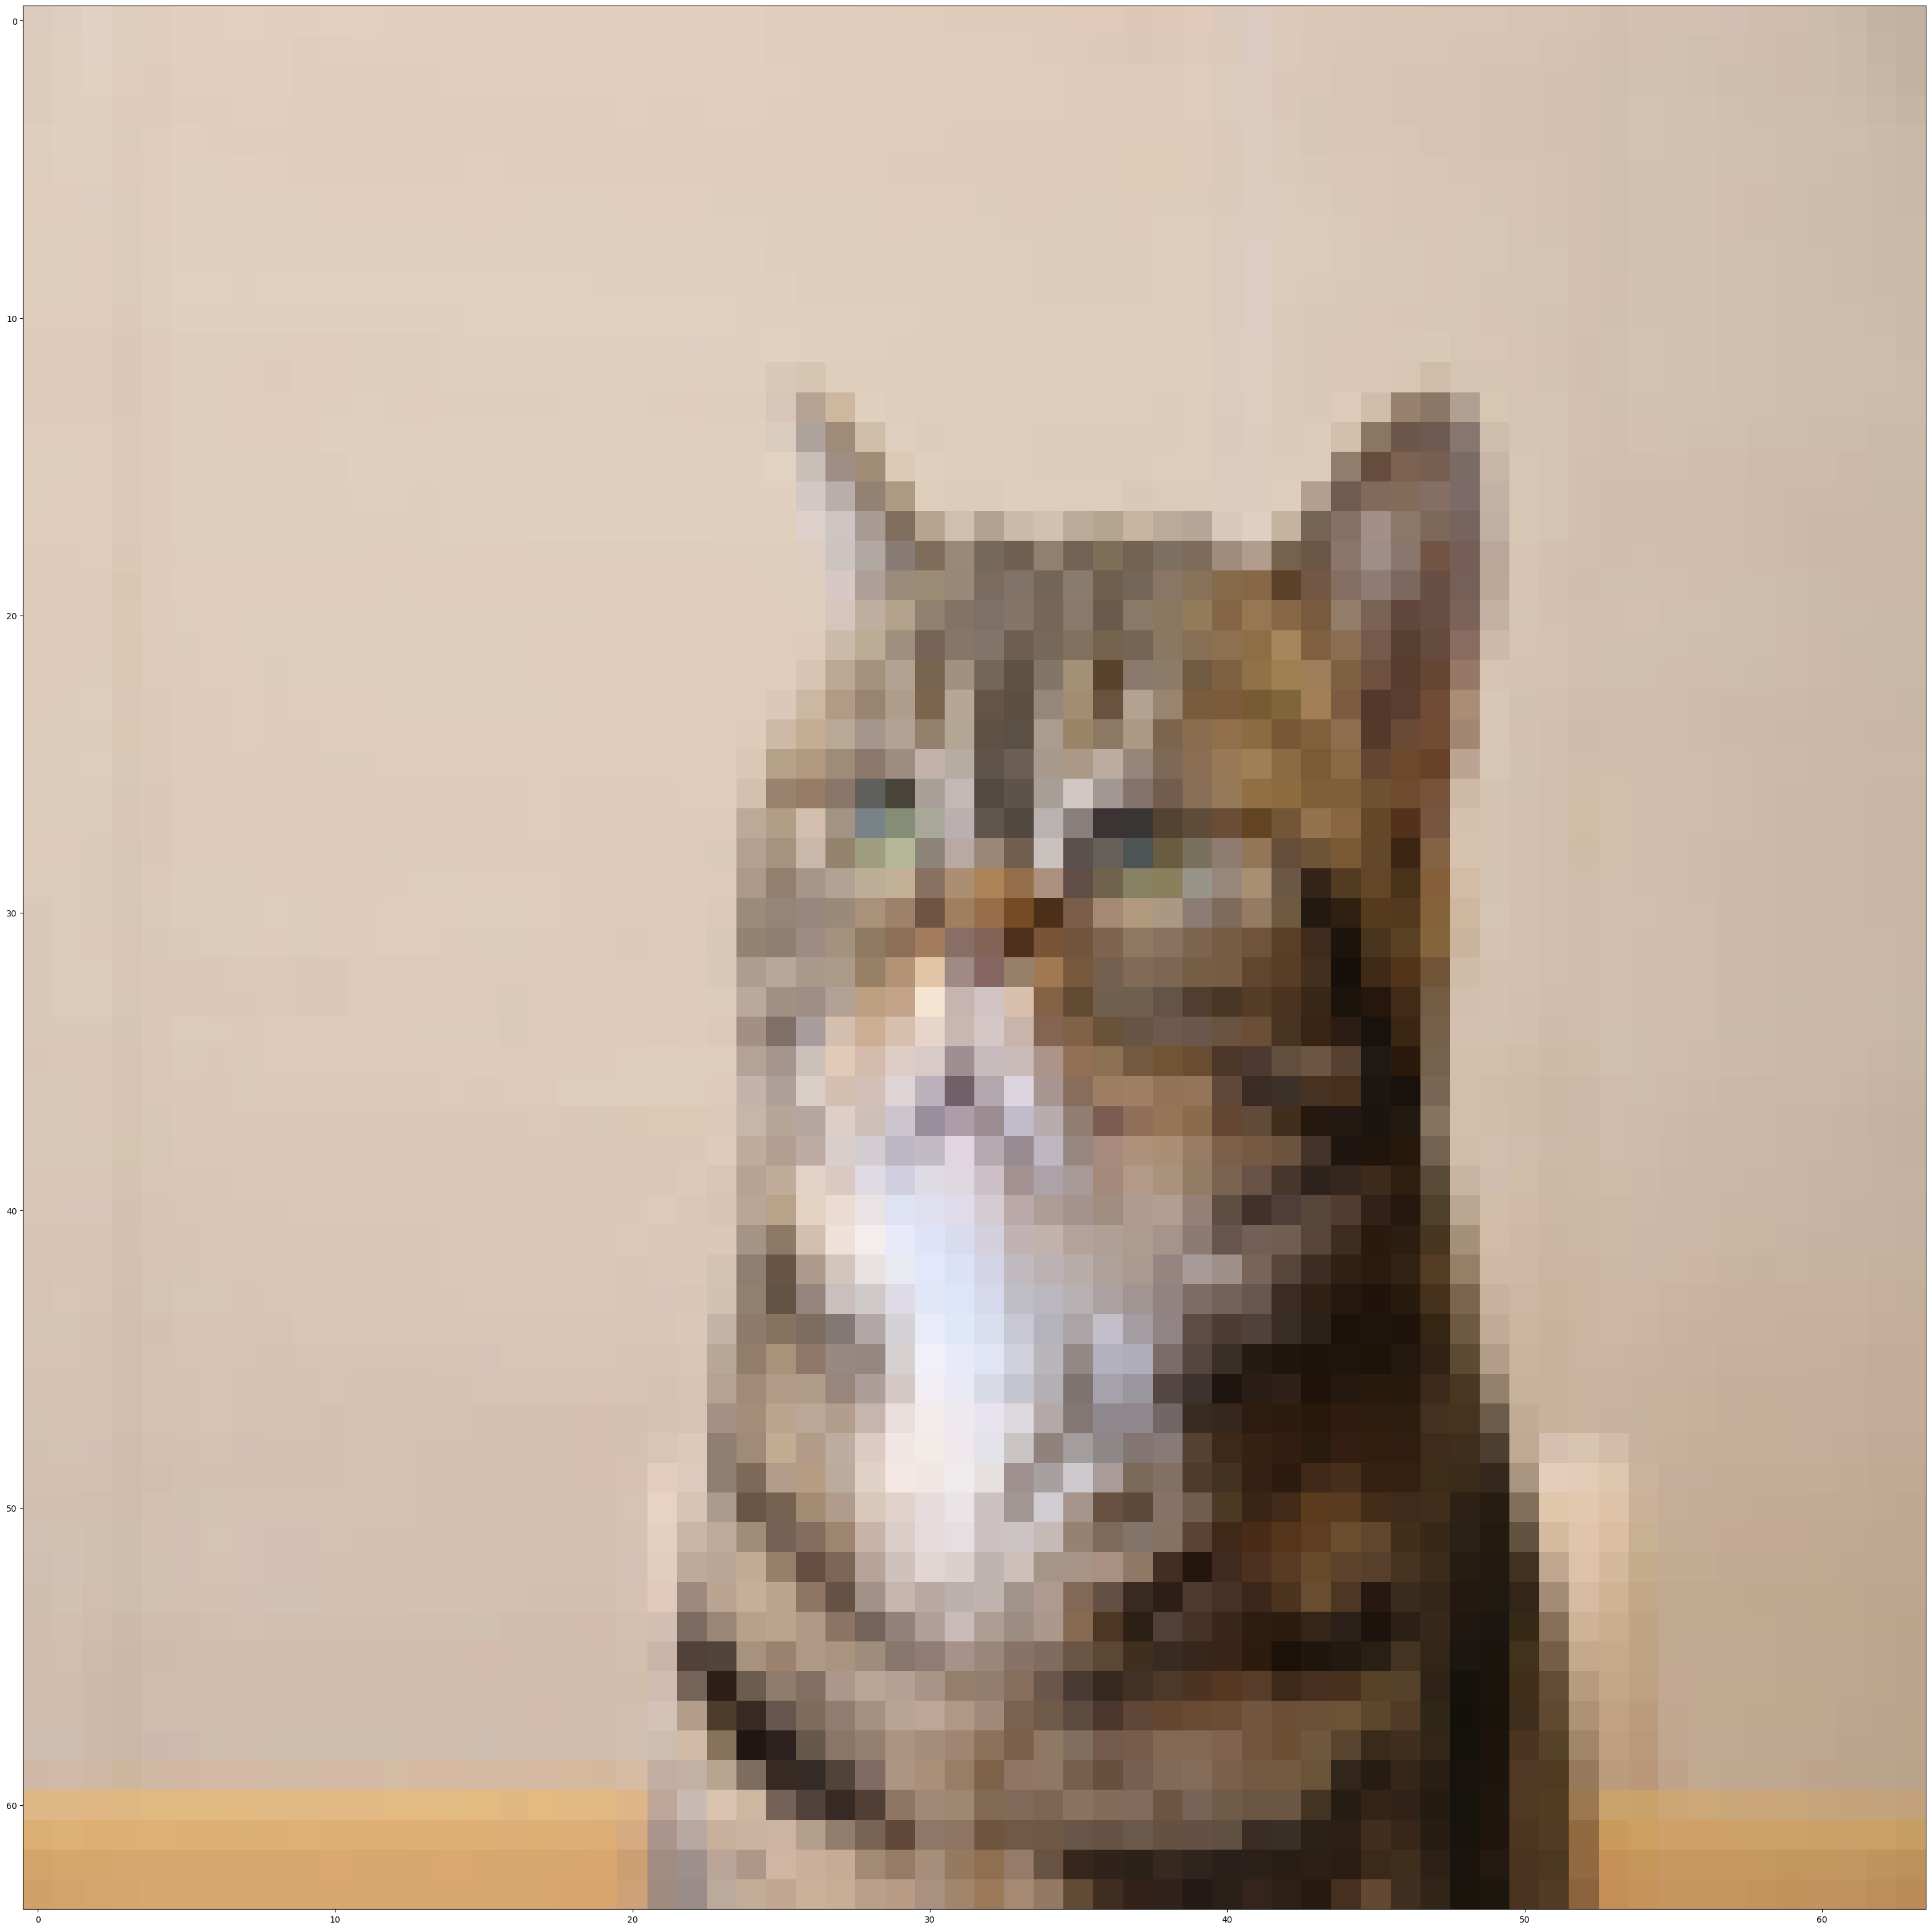

In [12]:
my_image = "test_image.jpg" # change this to the name of your image file, only .jpy files 
my_label_y = [1] # the true class of your image (1 -> cat, 0 -> non-cat)

fname = "images/" + my_image
image = np.array(Image.open(fname).resize((num_px, num_px)))
plt.imshow(image)
image = image / 255.
image = image.reshape((1, num_px * num_px * 3)).T

my_predicted_image = predict(image, my_label_y, parameters)


print ("y = " + str(np.squeeze(my_predicted_image)) + ", your L-layer model predicts a \"" + classes[int(np.squeeze(my_predicted_image)),].decode("utf-8") +  "\" picture.")